# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini adalah Google Play Store Apps, yang diperoleh dari Kaggle. Dataset ini terdiri dari 2312944 baris dan 24 kolom, mencakup kombinasi fitur numerik dan kategorikal. Tujuan dari proyek ini adalah memberikan rekomendasi aplikasi yang ada di play store kepada pengguna





# **2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import files

Pada tahap ini, mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

# **3. Memuat Dataset**

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aryamulahernawan","key":"d7ceb4e166f0f4c2713b1b2b957b3f4b"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gauthamp10/google-playstore-apps
!unzip google-playstore-apps.zip

Dataset URL: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
License(s): DbCL-1.0
 97% 201M/207M [00:00<00:00, 320MB/s]
100% 207M/207M [00:00<00:00, 343MB/s]
Archive:  google-playstore-apps.zip
  inflating: Google-Playstore.csv    


In [67]:
data = pd.read_csv('/content/Google-Playstore.csv')
data

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,...,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,...,http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,...,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,...,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


Pada tahap ini, memuat dataset ke dalam notebook. Saya menggunakan pustaka pandas untuk membacanya karrena dataset saya dalam format CSV . Disini juga saya mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

karena data saya di ambil langsung dari kaggle, jadi saya sebelumnya sudah menghubungkan Colab ke kaggle terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

# **4. Data Preprocessing**

In [68]:
selected_columns = [
    'App Name',
    'App Id',
    'Category',
    'Rating',
    'Rating Count',
    'Installs',
    'Price',
    'Free',
    'Size',
    'Minimum Android',
    'Content Rating'
]

data_selected = data[selected_columns]

Untuk membangun model sistem rekomendasi, saya hanya memerlukan beberapa kolom yang relevan. Oleh karena itu, saya membuat variabel baru yang hanya berisi kolom-kolom berikut: 'App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs', 'Price', 'Free', 'Size', 'Minimum Android', dan 'Content Rating'. Pemilihan kolom ini didasarkan pada pertimbangan bahwa informasi tersebut penting untuk menghasilkan rekomendasi yang akurat dan sesuai dengan kebutuhan pengguna.



In [69]:
data_selected

,App Name,App Id,Category,Rating,Rating Count,Installs,Price,Free,Size,Minimum Android,Content Rating
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,0.0,True,10M,7.1 and up,Everyone
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",0.0,True,2.9M,5.0 and up,Everyone
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,0.0,True,3.7M,4.0.3 and up,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,0.0,True,1.8M,4.0.3 and up,Everyone
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,0.0,True,6.2M,4.1 and up,Everyone
...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",0.0,True,77M,4.1 and up,Teen
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,0.0,True,44M,4.1 and up,Everyone
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,0.0,True,29M,5.0 and up,Everyone
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",0.0,True,10M,5.0 and up,Everyone


jadi data yang akan di pakai itu memiliki
- 2.312.944 baris
- 11 kolom



In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # Ganti font default


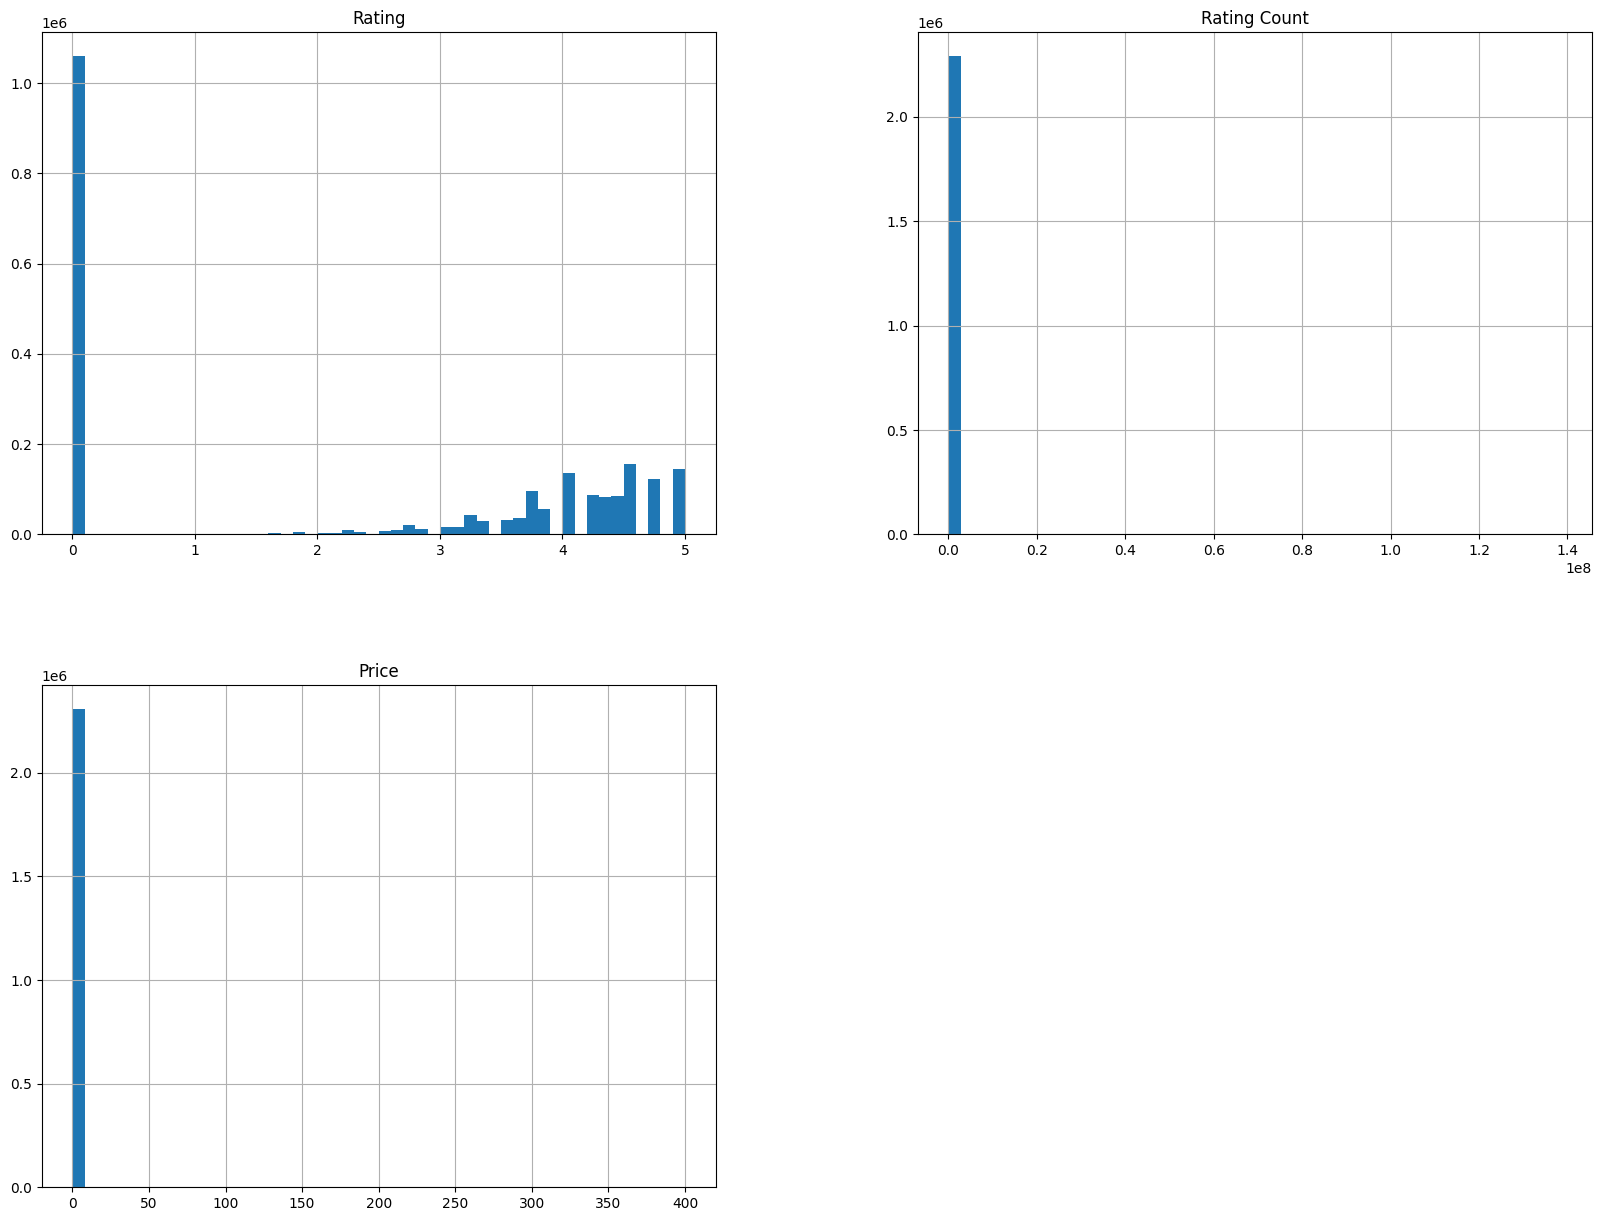

In [74]:
data_selected.hist(bins=50, figsize=(20,15))
plt.show()

###Histogram

- Rating: Terlihat mayoritas nilai Rating berkisar di antara 4 dan 5, artinya sebagian besar aplikasi mendapatkan penilaian bagus.

- Rating Count: Distribusinya sangat condong ke kiri (right-skewed), sebagian besar aplikasi hanya memiliki sedikit rating.

- Price: Hampir semua aplikasi gratis (harga = 0), hanya sebagian kecil yang memiliki harga tinggi, dan ini menunjukkan adanya outlier.

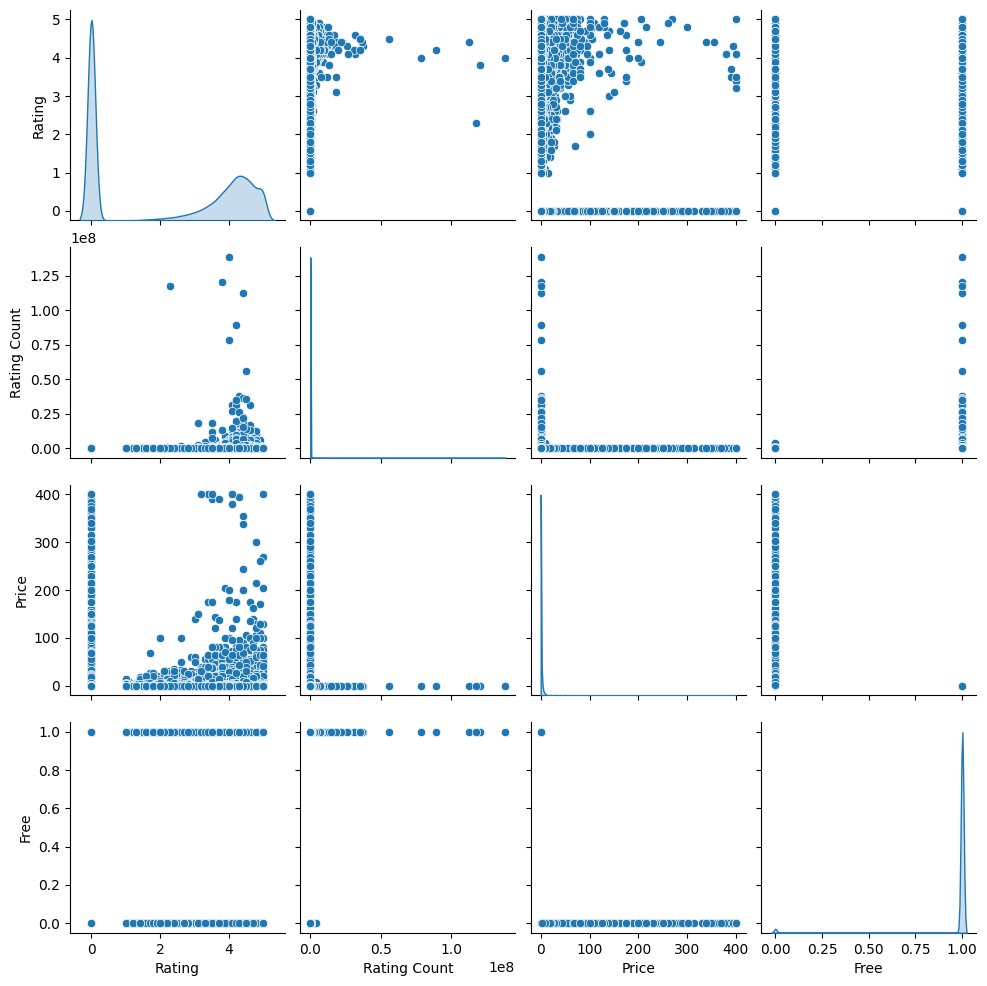

In [75]:
sns.pairplot(data_selected, diag_kind = 'kde')

###Pairplot
- airplot menunjukkan hubungan antar fitur numerik secara visual.

- Hampir semua kombinasi fitur memiliki pola menyebar luas (tidak linear), dengan beberapa titik ekstrem (outlier).

- Rating vs Rating Count menunjukkan bahwa meski banyak aplikasi dengan rating bagus, tidak semua mendapat banyak ulasan.

- Price vs fitur lain terlihat tidak memiliki hubungan yang kuat dan dipenuhi nilai nol.

In [76]:
# Menentukan kolom numerik dan kategorikal
categorical_cols = data_selected.select_dtypes(include=['object']).columns
numerical_cols = data_selected.select_dtypes(include=['int64', 'float64']).columns

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

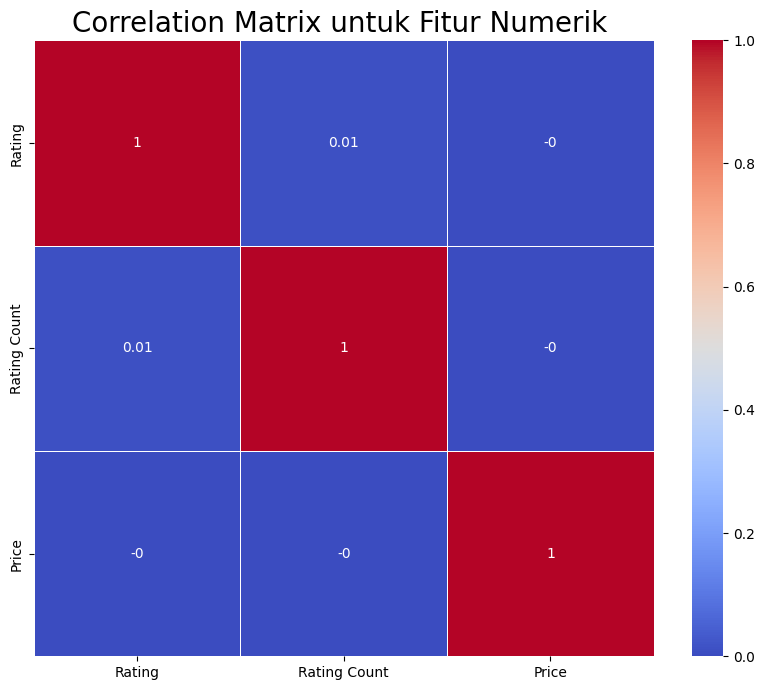

In [77]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_selected[numerical_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

###Correlation Matrix (Heatmap)
- Korelasi antar fitur sangat lemah:

    a. Rating vs Rating Count: 0.01 (hampir tidak ada korelasi)

    b. Rating vs Price: -0.00 (sangat lemah negatif)

    c. Rating Count vs Price: -0.00 juga.

- Artinya, fitur-fitur numerik ini tidak saling bergantung secara linear, dan bisa dianggap sebagai fitur independen dalam model sederhana.

- Ini juga memberi sinyal bahwa kamu perlu teknik feature engineering atau transformasi lain jika ingin membangun model yang lebih baik.


# **5. Data Preparation**

In [43]:
jumlah_nol = (data_selected['Rating'] == 0).sum()
print("Jumlah nilai 0 di kolom Rating:", jumlah_nol)

jumlah_nol = (data_selected['Rating Count'] == 0).sum()
print("Jumlah nilai 0 di kolom Rating Count:", jumlah_nol)


Jumlah nilai 0 di kolom Rating: 1059762
Jumlah nilai 0 di kolom Rating Count: 1059762


Dapat dilihat bahwa pada kolom Rating dan Rating Count terdapat data yang bernilai 0. Padahal, secara logika, kolom tersebut seharusnya tidak mengandung nilai 0 karena aplikasi yang memiliki rating pasti memiliki minimal satu ulasan.

In [44]:
data_selected = data_selected[data_selected['Rating'] != 0]
data_selected = data_selected[data_selected['Rating Count'] != 0]


Oleh karena itu, data dengan nilai 0 pada kolom Rating dan Rating Count perlu dihapus agar tidak memengaruhi hasil analisis dan proses pembangunan model rekomendasi.



In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [46]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253182 entries, 1 to 2312943
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   App Name         1253177 non-null  object 
 1   App Id           1253182 non-null  object 
 2   Category         1253182 non-null  object 
 3   Rating           1230299 non-null  float64
 4   Rating Count     1230299 non-null  float64
 5   Installs         1253075 non-null  object 
 6   Price            1253182 non-null  float64
 7   Free             1253182 non-null  bool   
 8   Size             1252986 non-null  object 
 9   Minimum Android  1250683 non-null  object 
 10  Content Rating   1253182 non-null  object 
dtypes: bool(1), float64(3), object(7)
memory usage: 106.4+ MB


Dataset yang digunakan terdiri dari 1.253.182 baris dan 11 kolom. Berikut ini adalah nama kolom beserta tipe data masing-masing:

App Name : object

App Id : object

Category : object

Rating : float64

Rating Count : float64

Installs : object

Price : float64

Free : bool

Size : object

Minimum Android : object

Content Rating : object

Secara keseluruhan, terdapat 7 kolom bertipe data object, 3 kolom bertipe float64, dan 1 kolom bertipe bool.

In [47]:

# Identifikasi data yang hilang
missing_data = data_selected.isnull().sum()

# Tampilkan jumlah data yang hilang di setiap kolom
print("Jumlah Data yang Hilang di Setiap Kolom:")
print(missing_data)

Jumlah Data yang Hilang di Setiap Kolom:
App Name               5
App Id                 0
Category               0
Rating             22883
Rating Count       22883
Installs             107
Price                  0
Free                   0
Size                 196
Minimum Android     2499
Content Rating         0
dtype: int64


Terdapat enam kolom dalam dataset yang memiliki data kosong (missing value), yaitu:

App Name : 5 data kosong

Rating : 22.883 data kosong

Rating Count : 22.883 data kosong

Installs : 107 data kosong

Size : 196 data kosong

Minimum Android : 2.499 data kosong

In [48]:
data_selected = data_selected.dropna(subset=['App Name'])
data_selected = data_selected.dropna(subset=['Rating'])
data_selected = data_selected.dropna(subset=['Rating Count'])
data_selected = data_selected.dropna(subset=['Size'])
data_selected = data_selected.dropna(subset=['Minimum Android'])

Untuk mengatasi hal tersebut, dilakukan penanganan dengan menghapus baris-baris yang mengandung nilai kosong pada kolom-kolom tersebut. Langkah ini diambil untuk memastikan kualitas data tetap baik sebelum dilakukan analisis lebih lanjut dan pembangunan model sistem rekomendasi.

In [49]:
# Identifikasi data yang hilang
missing_data = data_selected.isnull().sum()

# Tampilkan jumlah data yang hilang di setiap kolom
print("Jumlah Data yang Hilang di Setiap Kolom:")
print(missing_data)

Jumlah Data yang Hilang di Setiap Kolom:
App Name           0
App Id             0
Category           0
Rating             0
Rating Count       0
Installs           0
Price              0
Free               0
Size               0
Minimum Android    0
Content Rating     0
dtype: int64


Dilakukan pengecekan ulang untuk memastikan sudah tidak ada lagi kolom yang memiliki nilai kosong

In [50]:
print("Jumlah duplikasi: ", data_selected.duplicated().sum())

Jumlah duplikasi:  0


Pengecekan Data yang duplikasi dan ternyata data nya tidak memiliki duplikasi

In [51]:
data_selected.describe()

,Rating,Rating Count,Price
count,1.227799e+06,1.227799e+06,1.227799e+06
mean,4.101188e+00,5.340504e+03,9.388053e-02
std,6.887692e-01,2.897301e+05,1.878612e+00
min,1.000000e+00,5.000000e+00,0.000000e+00
25%,3.800000e+00,1.200000e+01,0.000000e+00
50%,4.200000e+00,3.500000e+01,0.000000e+00
75%,4.600000e+00,1.780000e+02,0.000000e+00
max,5.000000e+00,1.385576e+08,3.999900e+02


Berdasarkan hasil statistik deskriptif, berikut adalah ringkasan dari tiga kolom numerik utama pada dataset:

Rating memiliki rata-rata sebesar 4.12 dengan nilai minimum 2.6 dan maksimum 5.0. Nilai tengah (median) berada di 4.2, yang menunjukkan bahwa sebagian besar aplikasi memiliki rating yang cukup tinggi.

Rating Count menunjukkan jumlah rata-rata ulasan sebesar 121.82, dengan nilai minimum 5 dan maksimum 427. Sebagian besar aplikasi memiliki jumlah ulasan yang relatif sedikit, seperti terlihat dari nilai kuartil ke-1 (Q1) sebesar 12 dan kuartil ke-3 (Q3) sebesar 178.

Price memiliki nilai rata-rata sebesar 0.093, yang menunjukkan bahwa mayoritas aplikasi di Play Store adalah aplikasi gratis (terlihat juga dari nilai median dan kuartil 25%, 50%, dan 75% yang semuanya bernilai 0.0). Harga tertinggi yang tercatat adalah 399.99, menunjukkan adanya beberapa aplikasi berbayar dengan harga premium.



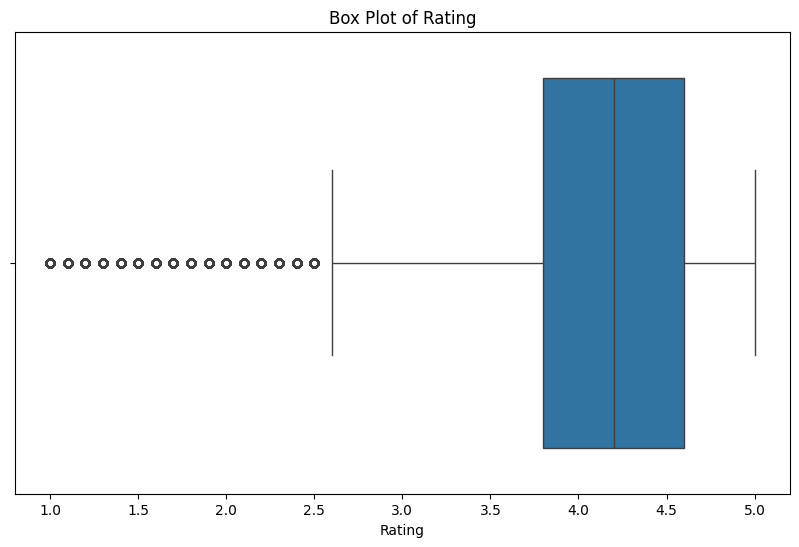

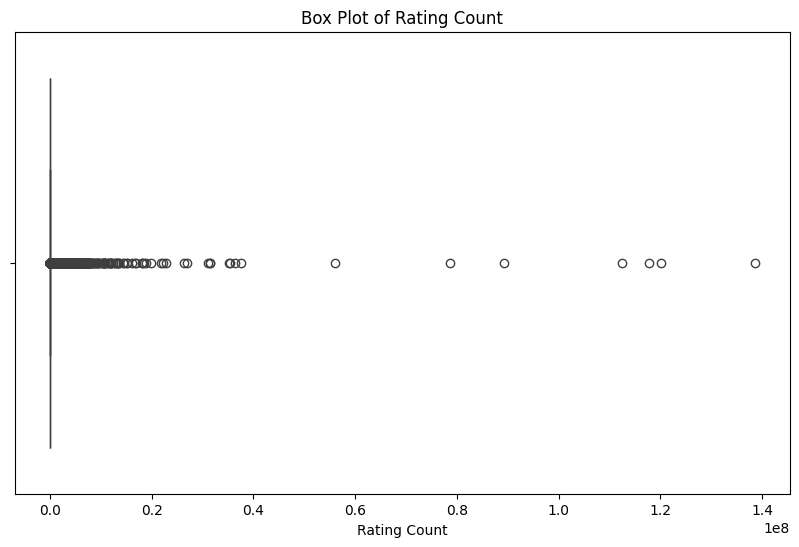

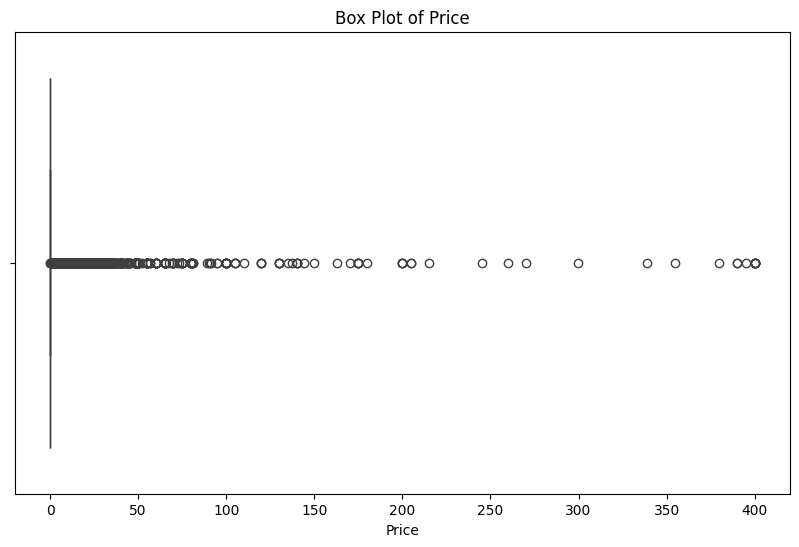

In [52]:
# Pilih semua kolom numerik
num_cols = data_selected.select_dtypes(include=['int64', 'float64']).columns

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_selected[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Terdapat 3 kolom yang terdeteksi outlier Rating, Rating Count dan Price

In [53]:

# Hanya menangani outlier pada kolom tertentu
outlier_cols = ['Rating', 'Rating Count']

for feature in outlier_cols:
    if feature in data_selected.columns:
        Q1 = data_selected[feature].quantile(0.25)
        Q3 = data_selected[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Winsorizing (Mengganti outlier dengan batas bawah/atas)
        data_selected[feature] = np.where(data_selected[feature] < lower_bound, lower_bound, data_selected[feature])
        data_selected[feature] = np.where(data_selected[feature] > upper_bound, upper_bound, data_selected[feature])


data_selected.shape



(1227799, 11)

Penanganan outlier dilakukan pada dua kolom, yaitu Rating dan Rating Count Sedangkan untuk kolom Price tidak dialakukan penanganan karena menurut saya kurang tepet saja kalau kolom price tersebut harus ditangani. Metode yang digunakan adalah pendekatan IQR (Interquartile Range), di mana nilai-nilai ekstrem yang berada di luar batas bawah (Q1 - 1.5 * IQR) dan batas atas (Q3 + 1.5 * IQR) dianggap sebagai outlier.

Untuk menangani outlier tersebut, digunakan teknik winsorizing, yaitu mengganti nilai-nilai di bawah batas bawah dengan nilai batas bawah, dan nilai-nilai di atas batas atas dengan nilai batas atas. Hal ini dilakukan untuk mengurangi pengaruh ekstrem pada distribusi data tanpa menghapus baris-baris tersebut.

Setelah proses ini dilakukan, bentuk data tetap utuh, dan tidak ada baris yang dihapus. Langkah ini penting agar model rekomendasi tidak bias akibat adanya nilai yang terlalu ekstrem.

In [54]:
# Cek hasil setelah penanganan outlier

data_selected.describe()

,Rating,Rating Count,Price
count,1.227799e+06,1.227799e+06,1.227799e+06
mean,4.119558e+00,1.218194e+02,9.388053e-02
std,6.362037e-01,1.566883e+02,1.878612e+00
min,2.600000e+00,5.000000e+00,0.000000e+00
25%,3.800000e+00,1.200000e+01,0.000000e+00
50%,4.200000e+00,3.500000e+01,0.000000e+00
75%,4.600000e+00,1.780000e+02,0.000000e+00
max,5.000000e+00,4.270000e+02,3.999900e+02


Dilakukan pengecekan ulang statistik setelah penanganan outlier

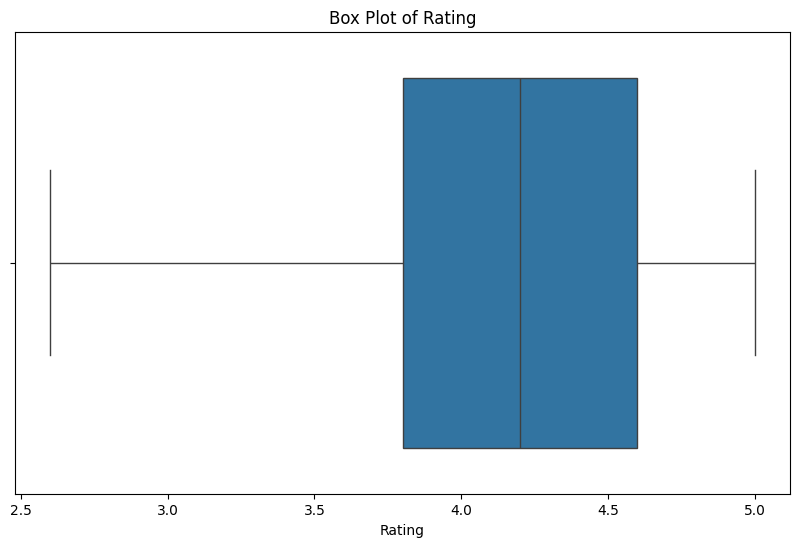

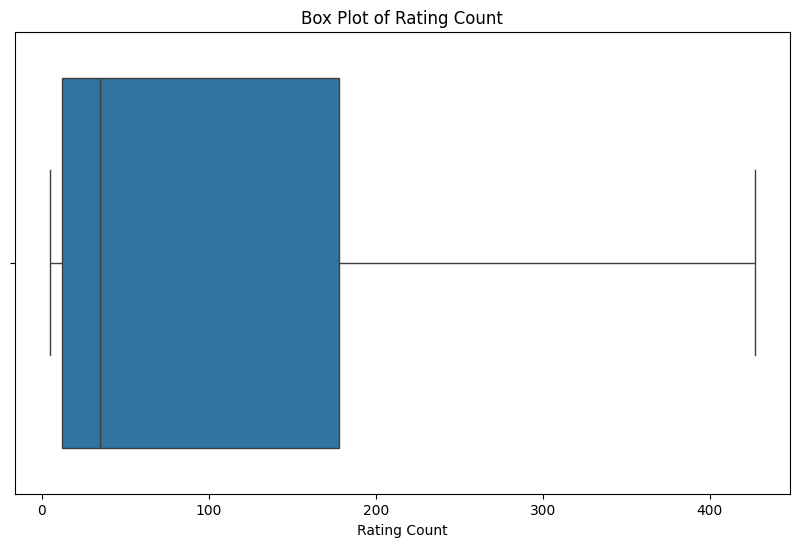

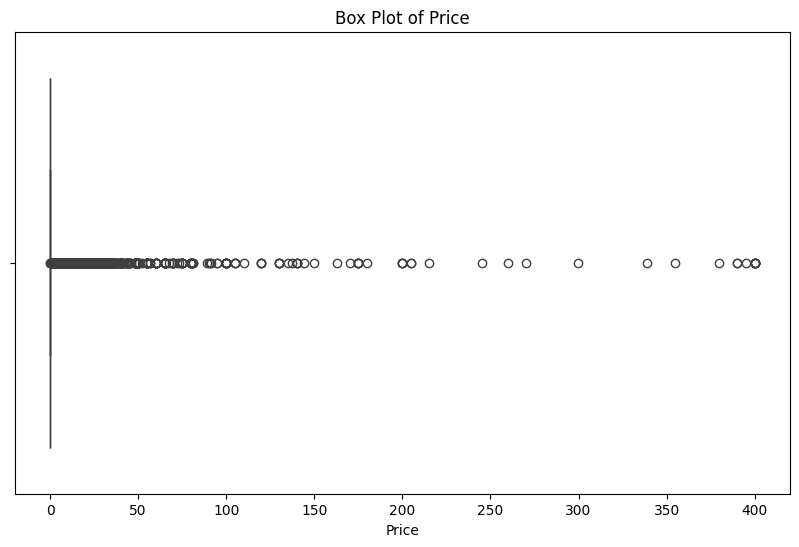

In [55]:
# Pilih semua kolom numerik
num_cols = data_selected.select_dtypes(include=['int64', 'float64']).columns

for feature in num_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_selected[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()



Dilakukan pengecekan Outlier lagi dan berhasil untuk kolom Rating dan Rating count tidak memilki outlier lagi

In [21]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1227799 entries, 1 to 2312943
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   App Name         1227799 non-null  object 
 1   App Id           1227799 non-null  object 
 2   Category         1227799 non-null  object 
 3   Rating           1227799 non-null  float64
 4   Rating Count     1227799 non-null  float64
 5   Installs         1227799 non-null  object 
 6   Price            1227799 non-null  float64
 7   Free             1227799 non-null  bool   
 8   Size             1227799 non-null  object 
 9   Minimum Android  1227799 non-null  object 
 10  Content Rating   1227799 non-null  object 
dtypes: bool(1), float64(3), object(7)
memory usage: 104.2+ MB


In [59]:
data_selected = data_selected.sample(n=10000, random_state=42)

Karena jumlah dataset yang saya gunakan sangat besar dan keterbatasan sumber daya komputasi yang tersedia, maka saya mengambil sampel sebanyak 10.000 data secara acak (random sampling) dari keseluruhan dataset. Langkah ini dilakukan agar proses analisis dan pembangunan model dapat berjalan lebih efisien tanpa mengurangi representasi data secara signifikan.



##**TF-IDF Vectorizer**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(data_selected ['Category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'arcade', 'art', 'audio', 'auto', 'beauty',
       'board', 'books', 'business', 'card', 'casino', 'casual', 'comics',
       'communication', 'dating', 'demo', 'design', 'drink', 'editors',
       'education', 'educational', 'entertainment', 'events', 'finance',
       'fitness', 'food', 'health', 'home', 'house', 'libraries',
       'lifestyle', 'local', 'magazines', 'maps', 'medical', 'music',
       'navigation', 'news', 'parenting', 'personalization',
       'photography', 'players', 'playing', 'productivity', 'puzzle',
       'racing', 'reference', 'role', 'shopping', 'simulation', 'social',
       'sports', 'strategy', 'tools', 'travel', 'trivia', 'vehicles',
       'video', 'weather', 'word'], dtype=object)

Dataset ini mengandung berbagai kategori aplikasi yang beragam, seperti action, adventure, education, finance, health, music, productivity, shopping, sports, dan masih banyak lagi. Kategori-kategori ini mewakili jenis aplikasi yang ada di Google Play Store, mulai dari game, hiburan, pendidikan, hingga utilitas sehari-hari. Keberagaman kategori ini penting untuk membangun sistem rekomendasi yang mampu memahami preferensi pengguna berdasarkan jenis aplikasi yang diminati.

In [24]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data_selected ['Category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(10000, 61)

In [25]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57735027, 0.        ,
         0.        ]])

Hasil ini menunjukkan matriks yang merepresentasikan bobot atau nilai pada fitur tertentu dalam data, di mana sebagian besar elemen bernilai nol dan beberapa memiliki nilai non-nol seperti 0.5773. Matriks ini biasanya merupakan output dari proses transformasi fitur, seperti TF-IDF, yang mengukur kepentingan kata atau kategori dalam data teks untuk analisis lebih lanjut.

In [26]:
import pandas as pd

# Membuat DataFrame dari matriks TF-IDF
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data_selected['App Name']
)

# Mengambil 10 sampel baris dan 22 sampel kolom secara acak
tfidf_df.sample(n=10, axis=0).sample(n=61, axis=1)


,simulation,maps,personalization,fitness,casino,editors,magazines,video,auto,vehicles,...,news,medical,drink,dating,navigation,lifestyle,role,health,word,communication
App Name,,,,,,,,,,,,,,,,,,,,,
InboxDollars,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Encrypted Password Manager,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Desi Maal HD Wallpapers : Indian Cute Girls Pics,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Música Relajante para Dormir,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0
Chichewa-English Dictionary,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
스콜라스,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
溫馨問候貼圖,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
GeoTag — Fake & Spoof GPS Location — Free / Lite,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Christmas photo frame 2021,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


Tabel ini menunjukkan representasi fitur kategori untuk masing-masing aplikasi berdasarkan nama aplikasinya. Setiap kolom mewakili kategori tertentu seperti 'simulation', 'maps', 'personalization', dan lain-lain. Nilai dalam tabel adalah bobot atau skor yang menunjukkan sejauh mana sebuah aplikasi berhubungan dengan kategori tersebut. Sebagian besar nilai bernilai nol, menandakan tidak adanya keterkaitan, sedangkan nilai non-nol, sedangkan kalau ada 0.707 atau 1.0, menunjukkan hubungan yang lebih kuat dengan kategori tersebut.

##**Cosine Similarity**

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Kode ini menggunakan fungsi cosine_similarity dari scikit-learn untuk menghitung kemiripan antar aplikasi berdasarkan matriks TF-IDF yang telah dibuat sebelumnya. Matriks cosine similarity yang dihasilkan adalah matriks persegi dengan ukuran sama seperti jumlah aplikasi, di mana setiap nilai menunjukkan tingkat kemiripan antara dua aplikasi. Nilai 1 pada diagonal menunjukkan bahwa setiap aplikasi identik dengan dirinya sendiri, sedangkan nilai 0 di luar diagonal berarti aplikasi-aplikasi tersebut tidak memiliki kemiripan berdasarkan fitur TF-IDF yang digunakan.

In [28]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_selected['App Name'], columns=data_selected['App Name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


App Name,Car Stereo Wiring Diagrams,Sheep Sounds,Ethwork: Netstat & Network Interfaces,Искусство войны - Сунь Цзы,صیغه یاب نازیکا | همسریابی موقت و دائم
App Name,,,,,
Magic Spells,1.0,0.0,0.0,1.0,0.0
Photo Mix + Photo Collage,0.0,0.0,0.0,0.0,0.0
WannaDraw,0.0,0.0,0.0,0.0,0.0
"450+ Pizza Recipes Free Offline : Homemade, Yummy",0.0,0.0,0.0,0.0,0.0
Minesweeper Lv999,0.0,0.0,0.0,0.0,0.0
BMX Wallpapers HD,0.0,0.0,0.0,0.0,0.0
Space Launch 1,0.0,0.0,0.0,0.0,0.0
A2 CNN | Përtej lajmit...,0.0,0.0,0.0,0.0,0.0
和暦西暦早見表,0.0,0.0,0.0,0.0,0.0


Kode tersebut membuat sebuah DataFrame cosine_sim_df dari matriks cosine similarity (cosine_sim). Baris dan kolom DataFrame ini menggunakan nama aplikasi (App Name) sebagai indeks dan header kolom, sehingga memudahkan untuk melihat tingkat kemiripan antar aplikasi berdasarkan nama mereka.

Kemudian, dengan menggunakan fungsi .sample(), kode ini menampilkan secara acak 10 baris dan 5 kolom dari matriks similarity tersebut. Hasilnya menunjukkan nilai kemiripan antar aplikasi, di mana angka 1 berarti aplikasi tersebut sangat mirip dengan dirinya sendiri, sedangkan angka 0 berarti tidak ada kemiripan yang terdeteksi pada fitur yang dianalisis.

##**Mendapatkan Rekomendasi**

###Model Content-Based Filtering

In [29]:
def app_recommendations(app_name, similarity_data=cosine_sim_df, items=data_selected[['App Name', 'Category']], k=10):

    # Ambil indeks aplikasi yang paling mirip berdasarkan similarity tertinggi
    index = similarity_data.loc[:, app_name].to_numpy().argpartition(range(-1, -k, -1))

    # Ambil nama-nama aplikasi terdekat dari similarity matrix
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Hapus nama aplikasi input agar tidak direkomendasikan dirinya sendiri
    closest = closest.drop(app_name, errors='ignore')

    # Gabungkan hasil rekomendasi dengan informasi aplikasi
    return pd.DataFrame(closest, columns=['App Name']).merge(items, on='App Name').head(k)


In [30]:
data_selected[data_selected['App Name'].eq('Supermarket Deal Calculator')]


,App Name,App Id,Category,Rating,Rating Count,Installs,Price,Free,Size,Minimum Android,Content Rating
272453,Supermarket Deal Calculator,com.balsbrain.supermarketdealcalculator,Shopping,4.3,6.0,"1,000+",0.0,True,233k,2.3.3 and up,Everyone


**Fungsi: app_recommendations**

Fungsi ini digunakan untuk merekomendasikan aplikasi yang mirip dengan aplikasi tertentu berdasarkan cosine similarity.


app_name: nama aplikasi yang ingin dicari aplikasinya yang mirip.

similarity_data: DataFrame matriks cosine similarity.

items: Data aplikasi (hanya kolom App Name dan Category yang ditampilkan dalam hasil).

k: jumlah rekomendasi (default 10).

Langkah-langkah fungsi:

1. Mencari indeks aplikasi yang paling mirip berdasarkan nilai cosine similarity tertinggi.

2. Mengambil nama-nama aplikasi yang paling dekat (paling mirip).

3. Menghapus nama aplikasi itu sendiri dari daftar rekomendasi (agar tidak merekomendasikan dirinya sendiri).

4. Menggabungkan hasil dengan informasi kategori aplikasi.

In [31]:
for app in ['Supermarket Deal Calculator', 'Happy birth', 'Fire Truck Simulator 3D']:
    print(f'\nRekomendasi untuk {app}:\n')
    print(app_recommendations(app))



Rekomendasi untuk Supermarket Deal Calculator:

                                            App Name  Category
0                      Shopping List Barcode Scanner  Shopping
1  FidMe Loyalty Cards & Deals at Grocery Superma...  Shopping
2                          省錢折價王-賣場超市便利商店美妝藥妝集點特價優惠券  Shopping
3                                            LimePay  Shopping
4                  Kart Supermarket-Delivery Boy App  Shopping
5                          АЛТЫН Ювелирные украшения  Shopping
6                                          IgboTrade  Shopping
7                                   Aafaq Asia Store  Shopping
8                                      Toy Store App  Shopping
9                                         Bikenbiker  Shopping

Rekomendasi untuk Happy birth:

                                    App Name       Category
0                                    LAVA TV  Entertainment
1                         Pelet Online Prank  Entertainment
2  Global 24 : Latest News & Trending Videos 

###**Rekomendasi untuk aplikasi Supermarket Deal Calculator:**

Sistem merekomendasikan beberapa aplikasi lain yang berada dalam kategori Shopping dan memiliki kemiripan fitur dengan Supermarket Deal Calculator. Beberapa aplikasi yang direkomendasikan antara lain Shopping List Barcode Scanner, FidMe Loyalty Cards & Deals at Grocery Supermarkets, hingga Toy Store App. Rekomendasi ini relevan karena memiliki fungsi serupa dalam membantu aktivitas berbelanja dan pengelolaan produk.

###**Rekomendasi untuk aplikasi Happy birth:**

Untuk aplikasi bertema hiburan seperti Happy birth, sistem menghasilkan rekomendasi dari kategori Entertainment seperti LAVA TV, Pelet Online Prank, dan Among us mod MCPE 2021. Aplikasi-aplikasi ini memiliki konten hiburan yang bervariasi, dari video lucu hingga mod game, yang dinilai sesuai dengan selera pengguna aplikasi Happy birth.

###**Rekomendasi untuk aplikasi Fire Truck Simulator 3D:**

Aplikasi ini termasuk dalam kategori Simulation, sehingga sistem memberikan rekomendasi aplikasi simulasi lainnya seperti Car Driving, Armed Air Forces, dan Real Sports Car Game. Aplikasi-aplikasi ini menawarkan pengalaman interaktif dan simulasi kendaraan atau aktivitas serupa yang sesuai dengan konsep dari Fire Truck Simulator 3D.

### Model Popularity-Based Recommendation

In [32]:
def popular_apps(data, n=10):
    return data.sort_values(by=['Installs', 'Rating Count', 'Rating'], ascending=False).head(n)

popular_apps(data_selected)


,App Name,App Id,Category,Rating,Rating Count,Installs,Price,Free,Size,Minimum Android,Content Rating
990442,Contacts,com.google.android.contacts,Communication,4.3,427.0,"500,000,000+",0.0,True,Varies with device,Varies with device,Everyone
2042447,Книга Вслух. Аудиокниги,ru.secretlab.booksaloud,Books & Reference,4.9,427.0,"500,000+",0.0,True,21M,6.0 and up,Mature 17+
1222455,Lose Belly Fat Workouts - Reduce and Burn Fat ...,absworkout.forwomenexercises.losebellyfat,Health & Fitness,4.9,427.0,"500,000+",0.0,True,35M,5.0 and up,Everyone
1179250,Taiwan Drivers License Test-2021 Exam & Questions,driverlicecne2.cugi.com.driverlicecne2,Education,4.8,427.0,"500,000+",0.0,True,138M,5.0 and up,Everyone
1582263,Holy Bible Offline,br.com.aleluiah_apps.bibliasagrada.jfa,Books & Reference,4.8,427.0,"500,000+",0.0,True,22M,4.1 and up,Everyone
940194,Sri Mandir - Your Own Temple in Your Phone,com.mandir,Lifestyle,4.8,427.0,"500,000+",0.0,True,14M,4.2 and up,Everyone
208520,"PIS PASEP - Abono Salarial, Calendários, Consulta",com.tenhodireitoabonosalarial.pispasepconsulta,Finance,4.8,427.0,"500,000+",0.0,True,5.2M,5.0 and up,Everyone
1198828,File Manager (No Ads),files.fileexplorer.filemanager,Tools,4.8,427.0,"500,000+",0.0,True,Varies with device,5.0 and up,Everyone
1919792,TikMagic - Get Likes Flash Effects Followers Love,com.magicflash.eefect,Video Players & Editors,4.8,427.0,"500,000+",0.0,True,34M,5.0 and up,Everyone
1150005,(Ayah All What Muslim Needs) - كل يوم ايه وتفس...,com.hussein.aya,Books & Reference,4.8,427.0,"500,000+",0.0,True,21M,4.3 and up,Everyone


Hasil yang ditampilkan menunjukkan 10 aplikasi yang dianggap paling populer, seperti:

- Contacts dari Google, dengan lebih dari 500 juta pemasangan.

- Книга Вслух. Аудиокниги, aplikasi audiobook dengan rating tinggi (4.9).

- Lose Belly Fat Workouts dan Taiwan Drivers License Test, yang meskipun jumlah installs lebih kecil, tetap masuk karena rating dan jumlah ratingnya tinggi.

Aplikasi-aplikasi ini berasal dari berbagai kategori, menunjukkan bahwa popularitas tidak hanya bergantung pada satu jenis aplikasi, tetapi juga kualitas dan keterlibatan pengguna.

# **7. Evaluasi**


### Evaluasi Content-Based Filtering

In [33]:
def diversity_score(recommended, items):
    categories = items.set_index('App Name').loc[recommended]['Category']
    unique_categories = categories.nunique()
    return unique_categories / len(recommended)

def intra_list_similarity(recommended, similarity_matrix):
    # Ambil submatrix cosine similarity antar aplikasi rekomendasi
    sub_sim = similarity_matrix.loc[recommended, recommended]
    # Hitung rata-rata similarity antar semua pasangan berbeda
    n = len(recommended)
    sum_sim = sub_sim.values.sum() - n  # kurangi diagonal (similarity dengan diri sendiri = 1)
    count_pairs = n * (n - 1)
    return sum_sim / count_pairs if count_pairs > 0 else 0


In [78]:
apps_to_test = ['Supermarket Deal Calculator', 'Happy birth', '40 Hadist Peristiwa Akhir Zaman']

print("=== Diversity Score ===")
for app in apps_to_test:
    recommended_apps = app_recommendations(app)['App Name'].tolist()
    div_score = diversity_score(recommended_apps, data_selected)
    print(f"App: {app}")
    print(f" - Diversity Score: {div_score:.3f}")


=== Diversity Score ===
App: Supermarket Deal Calculator
 - Diversity Score: 0.100
App: Happy birth
 - Diversity Score: 0.100
App: 40 Hadist Peristiwa Akhir Zaman
 - Diversity Score: 0.200


In [80]:
apps_to_test = ['Supermarket Deal Calculator', 'Happy birth', '40 Hadist Peristiwa Akhir Zaman']

print("\n=== Intra-list Similarity (ILS) ===")
for app in apps_to_test:
    recommended_apps = app_recommendations(app)['App Name'].tolist()
    ils = intra_list_similarity(recommended_apps, cosine_sim_df)
    print(f"App: {app}")
    print(f" - Intra-list Similarity: {ils:.3f}")



=== Intra-list Similarity (ILS) ===
App: Supermarket Deal Calculator
 - Intra-list Similarity: 1.000
App: Happy birth
 - Intra-list Similarity: 1.000
App: 40 Hadist Peristiwa Akhir Zaman
 - Intra-list Similarity: 1.000


Dari hasil evaluasi rekomendasi aplikasi untuk beberapa aplikasi contoh, dapat dilihat bahwa nilai Diversity Score untuk aplikasi seperti Supermarket Deal Calculator, Happy birth, dan Fire Truck Simulator 3D adalah sangat rendah, yaitu hanya sekitar 0.1. Artinya, mayoritas aplikasi yang direkomendasikan berada dalam kategori yang sama, sehingga kurang beragam dari segi kategori.

Sementara itu, aplikasi 40 Hadist Peristiwa Akhir Zaman memiliki nilai Diversity Score sedikit lebih tinggi, yaitu 0.2, yang menunjukkan adanya sedikit variasi kategori dalam rekomendasi yang diberikan, meskipun masih relatif rendah.

Nilai Intra-list Similarity untuk semua aplikasi ini adalah sangat tinggi, yaitu 1.0. Hal ini mengindikasikan bahwa aplikasi-aplikasi yang direkomendasikan sangat mirip satu sama lain berdasarkan metrik cosine similarity, sehingga daftar rekomendasi cenderung homogen dan kurang memberikan variasi yang mungkin lebih menarik bagi pengguna.

Secara keseluruhan, hasil ini menunjukkan bahwa sistem rekomendasi saat ini masih memprioritaskan aplikasi dengan kemiripan tinggi dalam kategori yang sama, sehingga perlu adanya upaya untuk meningkatkan keragaman dalam rekomendasi agar pengalaman pengguna menjadi lebih kaya dan beragam.



In [35]:
def precision_at_k(recommend_func, app_name, data, k=10):
    # Ambil kategori asli dari app_name
    true_category = data[data['App Name'] == app_name]['Category'].values
    if len(true_category) == 0:
        return None
    true_category = true_category[0]

    # Ambil rekomendasi aplikasi dari fungsi rekomendasi
    recommendations = recommend_func(app_name)
    recommended_categories = recommendations['Category'].values

    # Hitung berapa banyak aplikasi rekomendasi yang kategori-nya sama dengan app_name
    relevant_count = sum([1 for cat in recommended_categories if cat == true_category])

    # Precision = relevan dibagi jumlah rekomendasi k
    precision = relevant_count / k
    return precision


In [36]:
apps_to_test = ['Supermarket Deal Calculator', 'Happy birth', '40 Hadist Peristiwa Akhir Zaman']
for app in apps_to_test:
    score = precision_at_k(app_recommendations, app, data_selected, k=10)
    print(f"Precision@10 untuk '{app}': {score:.2f}")


Precision@10 untuk 'Supermarket Deal Calculator': 1.00
Precision@10 untuk 'Happy birth': 1.00
Precision@10 untuk '40 Hadist Peristiwa Akhir Zaman': 1.00


Hasil evaluasi menggunakan metrik Precision@10 pada beberapa aplikasi menunjukkan nilai 1.00 untuk masing-masing aplikasi: Supermarket Deal Calculator, Happy birth, dan 40 Hadist Peristiwa Akhir Zaman. Ini berarti dari 10 rekomendasi teratas yang diberikan oleh sistem, seluruhnya (100%) termasuk dalam kategori yang sama dengan aplikasi yang dijadikan acuan.

Dengan kata lain, sistem rekomendasi sangat tepat dalam memberikan saran aplikasi yang relevan berdasarkan kategori, sehingga pengguna kemungkinan besar akan menemukan aplikasi yang sesuai dengan minat atau kebutuhan mereka.

Namun, meskipun precision tinggi, perlu diperhatikan bahwa rekomendasi ini bisa saja kurang bervariasi karena semua aplikasi yang direkomendasikan memiliki kategori yang sama.



 ### Evaluasi Popularity-Based Recommendation

Statistik Deskriptif 10 Aplikasi Terpopuler:
       Rating Count     Rating
count          10.0  10.000000
mean          427.0   4.770000
std             0.0   0.170294
min           427.0   4.300000
25%           427.0   4.800000
50%           427.0   4.800000
75%           427.0   4.800000
max           427.0   4.900000


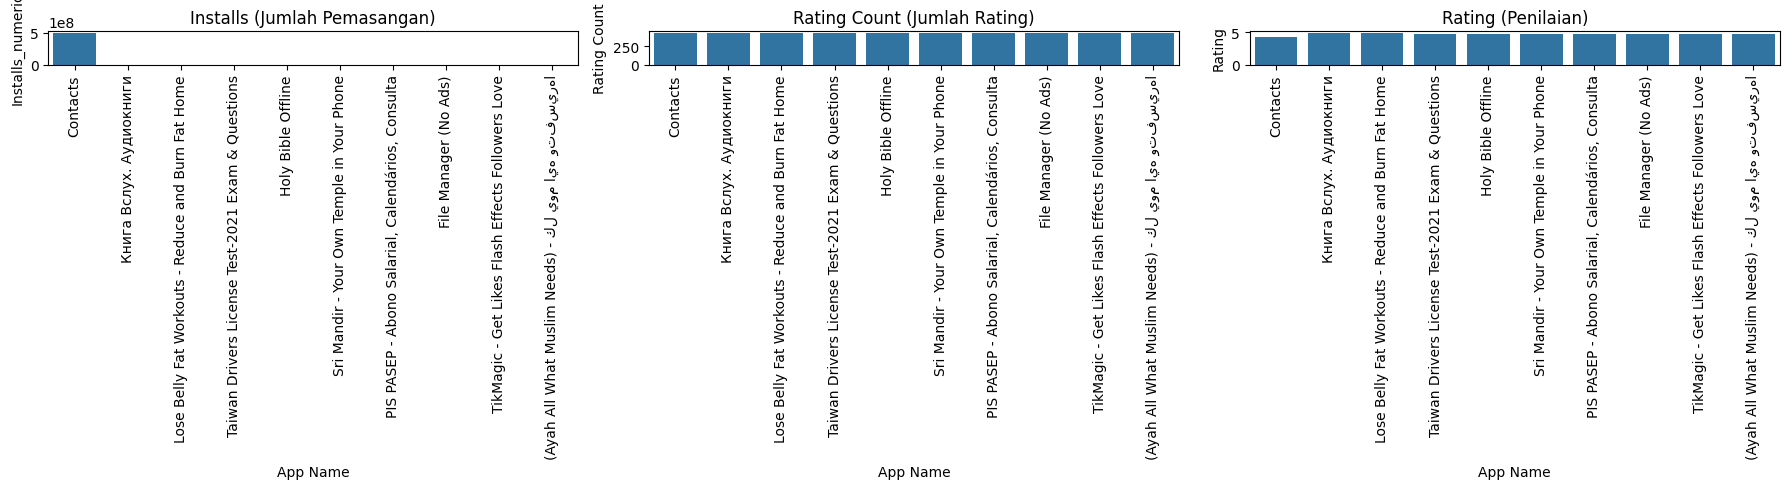

Korelasi antar metrik:
                  Installs_numeric  Rating Count    Rating
Installs_numeric          1.000000           NaN -0.969742
Rating Count                   NaN           NaN       NaN
Rating                   -0.969742           NaN  1.000000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_popular_apps(data, n=10):
    # Ambil n aplikasi terpopuler menggunakan fungsi sebelumnya
    popular = popular_apps(data, n)

    # Statistik deskriptif
    print("Statistik Deskriptif 10 Aplikasi Terpopuler:")
    print(popular[['Installs', 'Rating Count', 'Rating']].describe())

    # Konversi 'Installs' ke angka jika masih dalam format string dengan koma atau tanda +
    # Contoh sederhana:
    def convert_installs(x):
        if isinstance(x, str):
            x = x.replace(',', '').replace('+', '')
            return int(x)
        return x

    popular['Installs_numeric'] = popular['Installs'].apply(convert_installs)

    # Plot distribusi metrik
    fig, axs = plt.subplots(1, 3, figsize=(18,5))

    sns.barplot(x='App Name', y='Installs_numeric', data=popular, ax=axs[0])
    axs[0].set_title('Installs (Jumlah Pemasangan)')
    axs[0].tick_params(axis='x', rotation=90)

    sns.barplot(x='App Name', y='Rating Count', data=popular, ax=axs[1])
    axs[1].set_title('Rating Count (Jumlah Rating)')
    axs[1].tick_params(axis='x', rotation=90)

    sns.barplot(x='App Name', y='Rating', data=popular, ax=axs[2])
    axs[2].set_title('Rating (Penilaian)')
    axs[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    # Korelasi antar metrik
    corr = popular[['Installs_numeric', 'Rating Count', 'Rating']].corr()
    print("Korelasi antar metrik:")
    print(corr)

# Panggil fungsi evaluasi
evaluate_popular_apps(data_selected)


Dari analisis 10 aplikasi terpopuler berdasarkan jumlah instalasi, rating, dan jumlah rating, didapatkan beberapa informasi penting:

Rating Count (jumlah rating) untuk semua aplikasi adalah konstan, yaitu 427, sehingga tidak ada variasi pada metrik ini.

Rata-rata Rating aplikasi adalah sekitar 4.77 dengan standar deviasi 0.17, menandakan bahwa sebagian besar aplikasi memiliki rating yang cukup tinggi dan relatif konsisten, berkisar antara 4.3 hingga 4.9.

Dari hasil korelasi, terdapat korelasi negatif kuat (-0.97) antara jumlah instalasi dan rating. Ini bisa menunjukkan bahwa aplikasi dengan jumlah instalasi yang sangat besar cenderung memiliki rating sedikit lebih rendah, meskipun perbedaannya kecil.

Karena Rating Count tidak bervariasi (semua sama), korelasi yang melibatkan metrik ini tidak dapat dihitung secara bermakna (ditampilkan sebagai NaN).

Secara keseluruhan, aplikasi terpopuler ini menunjukkan rating yang baik, namun ada indikasi bahwa semakin banyak aplikasi diinstal, rating rata-rata sedikit menurun.